# EE 379K Lab 2
## Rohan Nagar and Wenyang Fu

In [63]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df1 = pd.read_csv('DF1')
df1 = df1.ix[:, 1:] # Drop first column, which is meant to be the row labels.
df1.head()

,0,1,2,3
0,1.038502,0.899865,0.835053,-0.971528
1,0.320455,-0.647459,0.149079,0.352593
2,0.055480,2.234771,0.271672,-2.108739
3,-0.007260,-0.524299,-0.126550,0.670827
4,-1.237390,-1.377017,-1.049932,1.342079


# Problem 1A

Look at the data in DF1 in Lab2.zip. Which columns are (pairwise) correlated? Figure out how to do this with Pandas, and also how to do this with Seaborn.

In [4]:
df1.corr()

,0,1,2,3
0,1.000000,-0.003998,0.990066,0.004111
1,-0.003998,1.000000,-0.004085,-0.990235
2,0.990066,-0.004085,1.000000,0.004067
3,0.004111,-0.990235,0.004067,1.000000


From our Pandas dataframe, we can see which ones are pairwise correlated with this matrix.

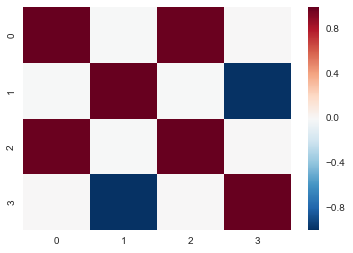

In [5]:
sns.heatmap(df1.corr())

We can also see this in our heatmap.

Answer: It looks ilke Columns 0&2 are pairwise correlated.

# Problem 1B
Compute the covariance matrix of the data. Write the explicit expression for what this is, and then use any command you like (e.g., np.cov) to compute the 4 × 4 matrix. Explain why the numbers that you get fit with the plots you got.

The covariance matrix is the pairwise covariance between each of the features in the data.

In [6]:
df1.cov()

,0,1,2,3
0,1.001558,-0.004012,0.991624,0.004125
1,-0.004012,1.005378,-0.004099,-0.995457
2,0.991624,-0.004099,1.001589,0.004081
3,0.004125,-0.995457,0.004081,1.005168


The numbers of the covariance matrix fit with the correlation plot because the correlation matrix is just the covariance matrix of standardized features/independent variables. [https://en.wikipedia.org/wiki/Covariance_matrix#Correlation_matrix]

# Problem 1C

The above problem in reverse. Generate a zero-mean multivariate Gaussian random variable in 3 dimensions, Z = (X1, X2, X3) so that (X1, X2) and (X1, X3) are uncorrelated, but (X2, X3) are correlated. Specifically: choose a covariance matrix that has the above correlations structure, and write this down. Then find a way to generate samples from this Gaussian. Choose one of the non-zero covariance terms (Cij, if C denotes your covariance matrix) and plot it vs the estimated covariance term, as the number of samples you use scales. The goal is to get a visual representation of how the empirical covariance converges to the true (or family) covariance

In [72]:
def estimate_covariance_with_samples(cov, i, j, num_samples):
    '''
    cov is the covariance matrix to sample from.
    i is the row of the matrix to compare.
    j is the column of the matrix to compare.
    num_samples is the number of samples that should be generated.
    '''
    samples = np.random.multivariate_normal([0,0,0], cov, num_samples)
    estimated_cov = np.cov(samples, rowvar=False)

    return estimated_cov[i][j]

Choosen covariance:
[[ 4.   0.   0. ]
 [ 0.   2.   0.5]
 [ 0.   0.5  7. ]]



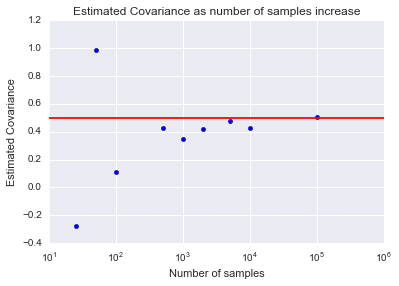

In [140]:
# Choose a covariance matrix
cov = [[4, 0, 0], [0, 2, 0.5], [0, 0.5, 7]]
print('Choosen covariance:\n{}\n'.format(np.matrix(cov)))

sizes = [25, 50, 100, 500, 1000, 2000, 5000, 10000, 100000]
estimations = []

for size in sizes:
    estimations.append(estimate_covariance_with_samples(cov, 1, 2, size))

# Plot estimations
fig = plt.figure()
ax = plt.gca()
ax.scatter(sizes, estimations)
ax.set_xscale('log')
ax.set_title('Estimated Covariance as number of samples increase')
plt.axhline(y=0.5, c='r')
plt.xlabel('Number of samples')
plt.ylabel('Estimated Covariance')

We can see that the estimated covariance (which is supposed to be 0.5) varies widely with a small number of samples, but as the number of samples increases, it tends to converage on the actual covariance.

# Problem 2
1. Look at the scatter plot of the data, and identify the two points that are potential outliers. Determine which one is "more" outlying.
2. Propose a transform of the data that will make it clear that (-1,1) is more outlying than (5,5), even though the latter point is "further away" from the nearest points.
3. Plot the data again after performing the xform.
4. Provide discussion to justify the choice of transformation.

In [78]:
df2 = pd.read_csv('DF2')
df2 = df2.ix[:, 1:]
df2.head()

,0,1
0,1.038502,0.835053
1,0.320455,0.149079
2,0.055480,0.271672
3,-0.007260,-0.126550
4,-1.237390,-1.049932


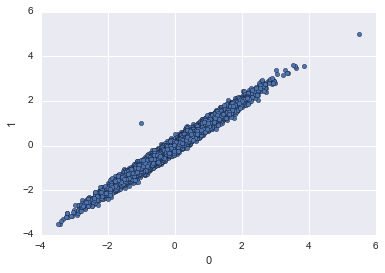

In [79]:
df2.plot.scatter(x='0', y='1')

I propose a transform that will subtract the min value for each feature and scale by (min - max) for each feature. In this case, the x-axis (featuer 0) has a far greater range (max - min) than the y-axis, so performing MinMax will shrink the x-axis more than the y-axis, revealing the outlier, which is far more prominent on the y-axis.

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Referenced from:
# https://stackoverflow.com/questions/24645153/pandas-dataframe-columns-scaling-with-sklearn

scaler = MinMaxScaler()
df2_scaled = scaler.fit_transform(df2)

In [9]:
df2_scaled = pd.DataFrame(data=df2_scaled)
df2_scaled.head()

,0,1
0,0.502707,0.511396
1,0.422671,0.430922
2,0.393136,0.445304
3,0.386143,0.398587
4,0.249029,0.290262


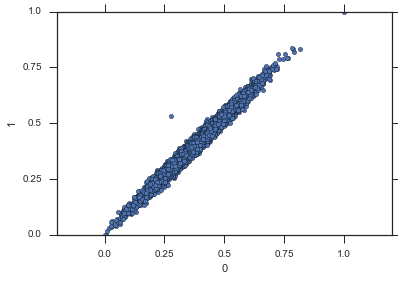

In [18]:
g = df2_scaled.plot.scatter(x=0, y=1)
# Scale axes so that x and y are equal, as opposed to
# x being wider than y
# https://stackoverflow.com/questions/37725462/how-can-i-rescale-axis-without-scaling-the-image-in-an-image-plot-with-matplotli
g.set_ylim([0, 1])
axes_ticks = list(np.linspace(0, 1, num=5))
plt.xticks(axes_ticks, axes_ticks)
plt.yticks(axes_ticks, axes_ticks)
plt.show()

Unfortunately, I don't know how to rescale the graph such that the ratio between the x and y axis is 1:1 (square grid), as opposed to rectangular grid. So I'll just settle for this hacky workaround.

# Problem 3

In [126]:
def empirical_std(n, beta=0):
    errors = []
    for i in range(n):
        X = np.random.randn(n)
        E = np.random.randn(n)
        y = -3 + np.dot(X,beta) + E

        beta_hat = np.dot(X,y) / np.dot(X,X)

        error = beta_hat - beta
        errors.append(error)

    # Compute the standard deviation
    return np.std(errors)

empirical_std(150)

0.26267561456588812

With the empirical standard deviation that we calculated, we can see that the $\hat{\beta}$ value of $-0.15$ is not very significant. This is because the empirical standard deviation of the error is greater than this value, so error can account for all of the $-0.15$.

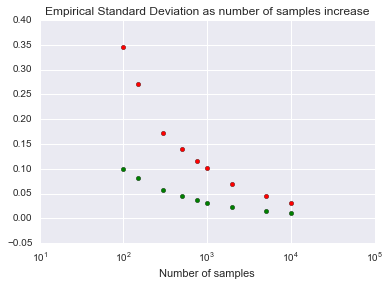

In [135]:
import math

n_values = [100, 150, 300, 500, 750, 1000, 2000, 5000, 10000]

std_devs = []
one_over_root = []
for value in n_values:
    std_devs.append(empirical_std(value))
    one_over_root.append(1/math.sqrt(value))
    
# Plot
fig = plt.figure()
ax = plt.gca()
ax.scatter(n_values, std_devs, c='r')
ax.scatter(n_values, one_over_root, c='g')
ax.set_xscale('log')
ax.set_title('Empirical Standard Deviation as number of samples increase')
plt.xlabel('Number of samples')

The red scatter plot is the empirical standard deviation. The green is $\frac{1}{\sqrt{n}}$. We notice that as the number of samples increases, the standard deviation goes down, which is what we expect. The fit of the two plots is really good.

# Problem 4

In [107]:
import glob
import re
from collections import Counter, defaultdict, OrderedDict


class NameOracle:
    def __init__(self):
        """ Parse all text files from a directory of popular names from 1880~2015,
        where each text file contains popular names for a particular year.
        """

        self.names_by_year = defaultdict(lambda: Counter())
        self.name_sex_count = defaultdict(lambda: Counter())
        self.name_trends = defaultdict(lambda: OrderedDict())
        path = 'Names/*.txt'
        files = glob.glob(path)
        for f in files:
            with open(f, 'r') as names_file:
                # Parse the year from the filename.
                # The regex will only match the first number that it finds.
                year = re.search('\d+', f.split('.')[0]).group(0)
                names_data = names_file.readlines()
                for name_data in names_data:
                    name, sex, count = name_data.strip().split(',')
                    count = int(count)
                    self.names_by_year[year][name] += count
                    self.name_sex_count[name][sex] += count
                    
                    if year not in self.name_trends[name]:
                        self.name_trends[name][year] = 0
                    
                    if sex == 'M':
                        self.name_trends[name][year] += count
                    else:
                        self.name_trends[name][year] -= count

    def top_k_by_year(self, k, year):
        """ Given a value k and a year, find the top-k most popular
        names of that year. """
        # collections.Counter implementation, from Python 2.7~3.5.2,
        # guarantees O(nlog(k)) time complexity, where n is the number of
        # unique names within a particular year.
        return self.names_by_year[year].most_common(k)

    def gender_frequency(self, name):
        """ Given a name, returns the 
        frequency for men and women of that name."""
        name_counts = self.name_sex_count[name]
        num_male = name_counts['M']
        num_female = name_counts['F']
        return (num_male, num_female)

    def name_frequency_by_year(self, name, year):
        """ Return the relative frequency (popularity) of a name
        within a particular year. """
        # Number of people with a paritcular name within a particular year
        name_count = self.names_by_year[year][name]
        # Total number of people who had a popular name during that year
        total = sum(self.names_by_year[year].values())
        return name_count / total
    
    def gender_swapped_names(self):
        """ Return a list of names that may have changed gender popularity
        at any year. The name will be included even if it was more popular
        for a different gender for only one year. In other words, a name
        will not be included only if it was always more popular for one gender.
        """
        names = []
        for name, diff in self.name_trends.items():
            prevPositive = False
            prevNegative = False
            for _, count in diff.items():
                if count >= 0 and prevNegative:
                    names.append(name)
                    break
                elif count < 0 and prevPositive:
                    names.append(name)
                    break
                elif count >= 0:
                    prevPositive = True
                else:
                    prevNegative = True
                    
        return names
                    
n = NameOracle()

### Write a program that on input k and XXXX, returns the top k names from year XXXX

In [56]:
n.top_k_by_year(10, '1880')

[('John', 9701),
 ('William', 9561),
 ('Mary', 7092),
 ('James', 5949),
 ('Charles', 5359),
 ('George', 5152),
 ('Frank', 3255),
 ('Joseph', 2642),
 ('Anna', 2616),
 ('Thomas', 2542)]

In [57]:
n.top_k_by_year(10, '2015')

[('Emma', 20365),
 ('Noah', 19648),
 ('Olivia', 19561),
 ('Liam', 18302),
 ('Sophia', 17341),
 ('Mason', 16626),
 ('Ava', 16305),
 ('Jacob', 15838),
 ('William', 15824),
 ('Isabella', 15525)]

### Write a program that on input Name returns the frequency for men and women of the name Name.

In [59]:
name = 'Emma'
male, female = n.gender_frequency(name)
print("Children named {}, male:{}. female:{}".format(name, male, female))

Children named Emma, male:1585. female:614505


### It could be that names are more diverse now than they were in 1880, so that a name may be relatively the most popular, though its frequency may have been decreasing over the years. Modify the above to return the relative frequency.

In [60]:
n.name_frequency_by_year('Emma', '2015')

0.00555179498950843

In [62]:
n.name_frequency_by_year('Joseph', '2004')

0.00529681413133427

### Find all the names that used to be more popular for one gender, but then became more popular for another gender.

In [108]:
n.gender_swapped_names()

['Alexandr',
 'Finley',
 'Marvis',
 'Teva',
 'Shoney',
 'Money',
 'Peris',
 'Azriel',
 'Salam',
 'Gemini',
 'Berkeley',
 'Nova',
 'Mirza',
 'Jersey',
 'Ellison',
 'Jovon',
 'Flory',
 'Chancie',
 'Shon',
 'Boluwatife',
 'Bunny',
 'Espn',
 'Presley',
 'Mickell',
 'Emerald',
 'Jontay',
 'Plumer',
 'Mackie',
 'Demaree',
 'Jernell',
 'Arlee',
 'Tal',
 'Melvis',
 'Hamdi',
 'Boots',
 'Kiran',
 'Gayle',
 'Shalom',
 'Carsen',
 'Jamary',
 'Orbie',
 'Tarren',
 'Donshae',
 'Aubry',
 'Zebbie',
 'Lyndell',
 'Gerd',
 'Beverley',
 'Carrington',
 'Kesley',
 'Myril',
 'Deni',
 'Dorcus',
 'Iria',
 'Joplin',
 'Allah',
 'Austyn',
 'Lo',
 'Jasyiah',
 'Tai',
 'Ermie',
 'Ronelle',
 'Rell',
 'Dondi',
 'Jovonnie',
 'Ravon',
 'Bayly',
 'Ibukunoluwa',
 'Seville',
 'Corley',
 'Leverne',
 'Riki',
 'Sham',
 'Xan',
 'Ridha',
 'Ji',
 'Victorious',
 'Graylyn',
 'Jaedin',
 'Arlet',
 'Omani',
 'Cassidy',
 'Reedie',
 'Montana',
 'Skylr',
 'Elvi',
 'Mang',
 'Shearl',
 'Jensy',
 'Nuri',
 'Azel',
 'Dezzie',
 'Allex',
 'Pranj

Note that the name will be included even if it was more popular for a different gender for only one year. In other words, a name will not be included only if it was always more popular for the same gender every year.

# Problem 5

The first part of this exercise was created by Dataquest. Run through the commands given in this tutorial: https://www.dataquest.io/blog/matplotlib-tutorial/ and understand the code.

In [111]:
import pandas as pd

tweets = pd.read_csv("tweets.csv")
tweets.head()

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.00,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...
1,2,729828033092161537,NaN,C0DEED,0,brittttany_ns,0.15,2016-05-10T00:18:57,NaN,18 // PSJAN,2012-12-24T17:33:12,1175,NaN,0.1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...
2,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.00,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...
3,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.00,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...
4,5,729828034178482177,"California, USA",131516,0,BJCG0830,0.00,2016-05-10T00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21T01:43:26,354,NaN,0.0,"RT @elianayjohnson: Per source, GOP megadonor ..."


In [112]:
def get_candidate(row):
    candidates = []
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text:
        candidates.append("trump")
    if "sanders" in text or "bernie" in text:
        candidates.append("sanders")
    return ",".join(candidates)

tweets["candidate"] = tweets.apply(get_candidate,axis=1)

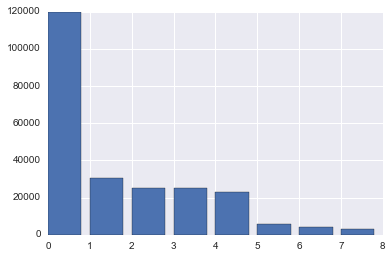

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64


In [113]:
counts = tweets["candidate"].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()

print(counts)

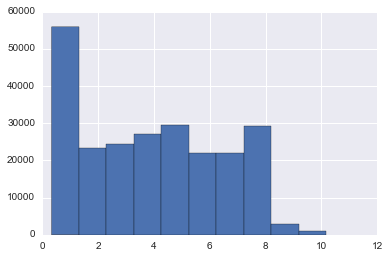

In [114]:
from datetime import datetime

tweets["created"] = pd.to_datetime(tweets["created"])
tweets["user_created"] = pd.to_datetime(tweets["user_created"])

tweets["user_age"] = tweets["user_created"].apply(lambda x: (datetime.now() - x).total_seconds() / 3600 / 24 / 365)
plt.hist(tweets["user_age"])
plt.show()

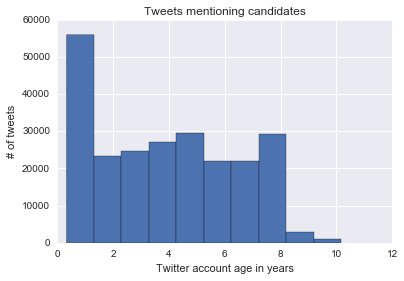

In [115]:
plt.hist(tweets["user_age"])
plt.title("Tweets mentioning candidates")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

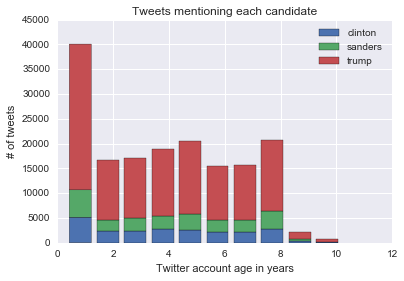

In [116]:
cl_tweets = tweets["user_age"][tweets["candidate"] == "clinton"]
sa_tweets = tweets["user_age"][tweets["candidate"] == "sanders"]
tr_tweets = tweets["user_age"][tweets["candidate"] == "trump"]
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"]
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

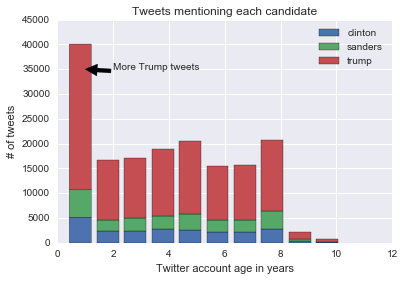

In [117]:
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"]
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.annotate('More Trump tweets', xy=(1, 35000), xytext=(2, 35000),
            arrowprops=dict(facecolor='black'))
plt.show()

# Suppose you'd like to aggregate by State. How would you do this?

In [142]:
tweets['user_location'].head(15)

0                    Wheeling WV
1                            NaN
2                            NaN
3                         global
4                California, USA
5                    Northern VA
6                            NaN
7                was calebsheIby
8                   New York, NY
9                 Pittsburgh, PA
10                           NaN
11                           NaN
12                           NaN
13    Isla Mujeres, Quintana Roo
14                           NaN
Name: user_location, dtype: object

## Answer
To filter the tweets by state, it would be necessary to build a thesaurus for all possible names a state could fall under.

e.g. Texas could be represented as Texas, TX, tx, or texas.

There are also cases where cities (like Houston) are in a particular state, but the state isn't explicitly listed. In those cases, we'd need to find the relevant state by searching via Google or some other service.

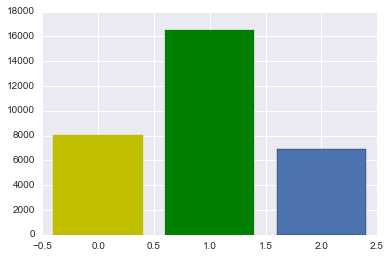

In [159]:
def state_count(state_filter):
    idxs = []
    for idx, loc in enumerate(tweets['user_location']):
        try:
            if any(state in loc for state in state_filter):
                idxs.append(idx)
        except TypeError:
            pass
    
    return len(idxs)

texas_tweets = state_count(['TX', 'tx', 'Texas', 'texas', 'Houston', 'Austin'])
california_tweets = state_count(['CA', 'ca', 'California', 'california', 'cali', 'SF', 'san francisco'])
florida_tweets = state_count(['FL', 'fl', 'Florida', 'florida', 'orlando'])

ax = plt.figure()
barlist = plt.bar(range(3), [texas_tweets, california_tweets, florida_tweets], align='center')
barlist[0].set_color('y')
barlist[1].set_color('g')

We can do this for multiple states, and also improve our thesaurus' for each state.